In [173]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [174]:
# carregar dados
def carrega_dados():
    return pd.read_csv("datasets/train.csv")

In [175]:
# extrair números de uma string
def extrai_numeros(string):
    return ''.join(re.findall(r'\d+', string))

In [176]:
# aplicar label encoding a uma lista de colunas
def aplica_label_encoding(df, lista_colunas):
    le = LabelEncoder()
    for coluna in lista_colunas:
        df[coluna] = le.fit_transform(df[coluna])
    return df

In [177]:
# balancear classes com SMOTE
def balanceamento_classes(X, y):
    sm = SMOTE(random_state=42)
    X_resampled, y_resampled = sm.fit_resample(X, y)
    return X_resampled, y_resampled

In [178]:
# normalizar dados
def normalizar_dados(X):
    scaler = MinMaxScaler()
    return scaler.fit_transform(X)

In [179]:
# carregar dados
df = carrega_dados()

# remover coluna desnecessária
df = df.drop(['Unnamed: 0'], axis=1)

# extrair números do código de área
df['area_code'] = df['area_code'].apply(extrai_numeros)

In [180]:
# aplicar label encoding a colunas de sim e não
df = aplica_label_encoding(df, ['state', 'international_plan', 'voice_mail_plan', 'churn'])

In [181]:
# criar conjunto de treinamento e teste
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [182]:
# balancear classes no conjunto de treinamento
X_train_bal, y_train_bal = balanceamento_classes(X_train, y_train)

In [183]:
# normalizar dados
X_train_bal_norm = normalizar_dados(X_train_bal)
X_test_norm = normalizar_dados(X_test)

In [184]:
df.sample(3)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1041,15,161,510,0,1,38,240.4,112,40.87,201.8,102,17.15,206.1,112,9.27,16.1,6,4.35,0,0
1778,5,54,510,0,1,39,117.6,82,19.99,159.2,60,13.53,236.4,113,10.64,11.3,10,3.05,2,0
2098,24,85,415,0,0,0,126.1,112,21.44,274.7,126,23.35,184.4,95,8.30,9.8,4,2.65,1,0


In [185]:
# treinar modelo de regressão logística
lr = LogisticRegression()
lr.fit(X_train_bal_norm, y_train_bal)

LogisticRegression()

Acurácia no conjunto de treinamento: 0.7329246935201401
Acurácia no conjunto de teste: 0.656671664167916
AUC-ROC: 0.8172165273064409
              precision    recall  f1-score   support

           0       0.96      0.62      0.75       566
           1       0.29      0.87      0.43       101

    accuracy                           0.66       667
   macro avg       0.63      0.74      0.59       667
weighted avg       0.86      0.66      0.71       667



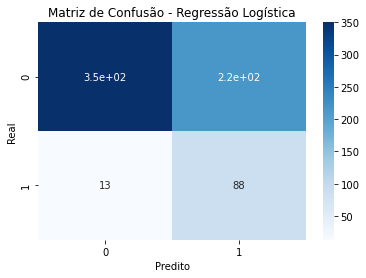

In [186]:
# avaliar modelo de regressão logística
print("Acurácia no conjunto de treinamento:", lr.score(X_train_bal_norm, y_train_bal))
print("Acurácia no conjunto de teste:", lr.score(X_test_norm, y_test))
print("AUC-ROC:", roc_auc_score(y_test, lr.predict_proba(X_test_norm)[:, 1]))
print(classification_report(y_test, lr.predict(X_test_norm)))
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test_norm)), annot=True, cmap='Blues')
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

In [187]:
# treinar modelo de floresta aleatória
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal_norm, y_train_bal)

RandomForestClassifier(random_state=42)

In [188]:
var_target = df['churn']
corr_matrix = df.corrwith(var_target)
corr_matrix = corr_matrix.sort_values(ascending=False)
print(corr_matrix)

churn                            1.000000
international_plan               0.259852
number_customer_service_calls    0.208750
total_day_minutes                0.205151
total_day_charge                 0.205151
total_eve_minutes                0.092796
total_eve_charge                 0.092786
total_intl_charge                0.068259
total_intl_minutes               0.068239
total_night_charge               0.035496
total_night_minutes              0.035493
total_day_calls                  0.018459
account_length                   0.016541
total_eve_calls                  0.009233
state                            0.007780
total_night_calls                0.006141
total_intl_calls                -0.052844
number_vmail_messages           -0.089728
voice_mail_plan                 -0.102148
dtype: float64


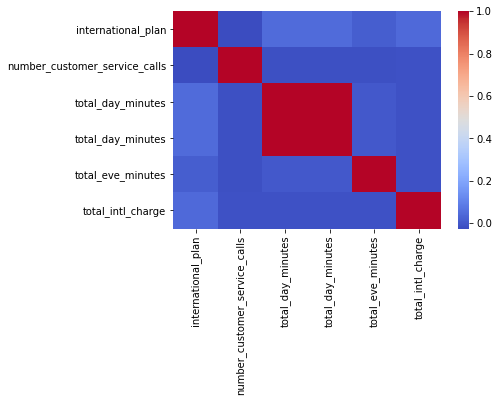

In [189]:
df_cor = df.loc[:, ['international_plan', 'number_customer_service_calls', 'total_day_minutes', 'total_day_minutes', 'total_eve_minutes', 'total_intl_charge' ]]
sns.heatmap(df_cor.corr(), cmap='coolwarm');

In [190]:
df_2 = df.loc[:, ['international_plan', 'number_customer_service_calls', 'total_day_minutes', 'total_day_minutes', 'total_eve_minutes', 'total_intl_charge', 'churn']]
df_2.sample(20)

,international_plan,number_customer_service_calls,total_day_minutes,total_day_minutes,total_eve_minutes,total_intl_charge,churn
1588,1,1,180.0,180.0,198.8,3.35,0
1833,0,2,208.7,208.7,275.5,2.16,0
2416,0,2,156.0,156.0,256.8,3.21,0
2258,1,1,276.5,276.5,195.6,1.94,1
1229,0,2,84.9,84.9,257.5,2.03,0
401,0,0,221.1,221.1,110.8,2.86,0
1527,0,0,117.1,117.1,235.4,2.43,0
1004,0,1,201.3,201.3,143.8,3.32,0
1696,0,1,215.6,215.6,200.6,3.35,0
1144,0,2,216.7,216.7,144.3,2.92,0


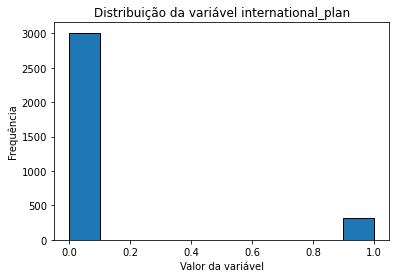

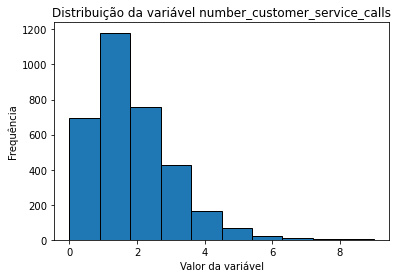

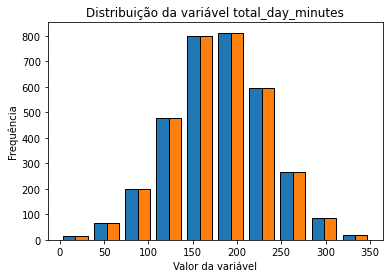

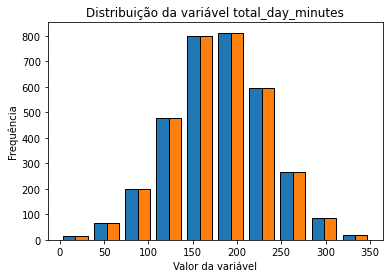

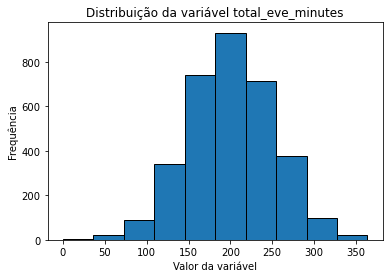

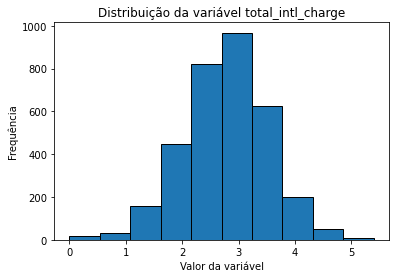

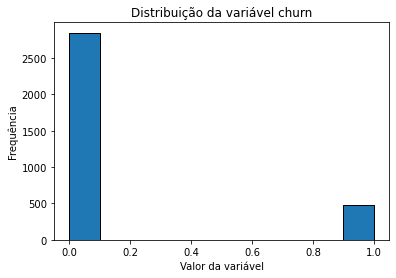

In [191]:
for col in df_2.columns:
    # Cria o histograma
    plt.hist(df_2[col], bins=10, edgecolor='black')
    plt.title('Distribuição da variável ' + col)
    plt.xlabel('Valor da variável')
    plt.ylabel('Frequência')
    plt.show()

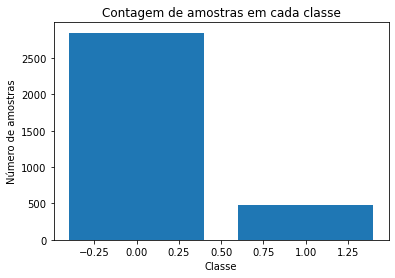

In [192]:
counts = df_2['churn'].value_counts()

# Exibe a contagem de classes em um gráfico de barras
plt.bar(counts.index, counts.values)
plt.title('Contagem de amostras em cada classe')
plt.xlabel('Classe')
plt.ylabel('Número de amostras')
plt.show()

In [193]:
X = df_2.drop('churn', axis=1)
y = df_2['churn']

In [194]:
X_resampled, y_resampled = balanceamento_clases(X, y)

KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

In [ ]:
df_3 = normalizar_dados(df_2)
df_3

In [ ]:
counts_2 = df_3['churn'].value_counts()

# Exibe a contagem de classes em um gráfico de barras
plt.bar(counts.index, counts.values)
plt.title('Contagem de amostras em cada classe')
plt.xlabel('Classe')
plt.ylabel('Número de amostras')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
selector = SelectKBest(f_classif, k=5)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_new, y_train)

In [ ]:
score = model.score(X_test_new, y_test)
print(f"Acurácia do modelo: {score}")